In [ ]:
#authors: Anna Cherkinsky and Anushka Bangal

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [ ]:
import os
import glob
import cv2
import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D
from keras import optimizers, applications
#https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/


The first steps are for loading the data from kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download xhlulu/140k-real-and-fake-faces

100% 3.74G/3.75G [00:36<00:00, 66.9MB/s]
100% 3.75G/3.75G [00:36<00:00, 109MB/s] 


In [ ]:
!unzip /content/140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [ ]:
path  = '/content/real_vs_fake/real-vs-fake'

In [ ]:
dataset = {"image_path":[],"img_status":[],"where":[]}
for where in os.listdir(path):
    print(where)
    for status in os.listdir(path+"/"+where):
        print(status)
        for image in glob.glob(path+"/"+where+"/"+status+"/*.jpg"):
            dataset["image_path"].append(image)
            dataset["img_status"].append(status)
            dataset["where"].append(where)
dataset = pd.DataFrame(dataset)
dataset

train
real
fake
test
real
fake
valid
real
fake


,image_path,img_status,where
0,/content/real_vs_fake/real-vs-fake/train/real/...,real,train
1,/content/real_vs_fake/real-vs-fake/train/real/...,real,train
2,/content/real_vs_fake/real-vs-fake/train/real/...,real,train
3,/content/real_vs_fake/real-vs-fake/train/real/...,real,train
4,/content/real_vs_fake/real-vs-fake/train/real/...,real,train
...,...,...,...
139995,/content/real_vs_fake/real-vs-fake/valid/fake/...,fake,valid
139996,/content/real_vs_fake/real-vs-fake/valid/fake/...,fake,valid
139997,/content/real_vs_fake/real-vs-fake/valid/fake/...,fake,valid
139998,/content/real_vs_fake/real-vs-fake/valid/fake/...,fake,valid


**Here are a few observations regarding some of the data (with regards to FFT)**

In [ ]:
image = imread(dataset.iloc[0]['image_path'])

In [ ]:
print(dataset.iloc[4]['img_status'])

real


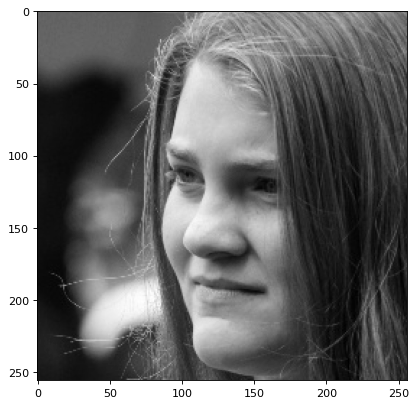

In [ ]:
#https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b

#Real image
image = imread(dataset.iloc[2]['image_path'])
dark_image_grey = rgb2gray(image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

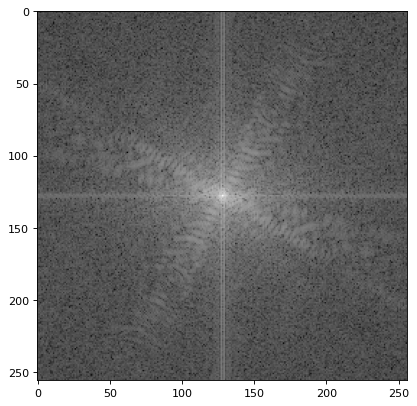

In [ ]:
import cv2 as cv

#Performing FFT on the real image
image = imread(dataset.iloc[4]['image_path'])
grayimg = cv.cvtColor(image, cv2.COLOR_BGR2GRAY)




dark_image_grey_fourier = np.abs(fftshift(fftn(grayimg)))#np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

In [ ]:
#https://github.com/mcherukara/FT_mnist/blob/master/deep_learning_mnist.ipynb

In [ ]:
from scipy.fftpack import fftn,fftshift

In [ ]:
image2 = imread(dataset.iloc[139994]['image_path'])

In [ ]:
print(dataset.iloc[139994]['img_status'])

fake


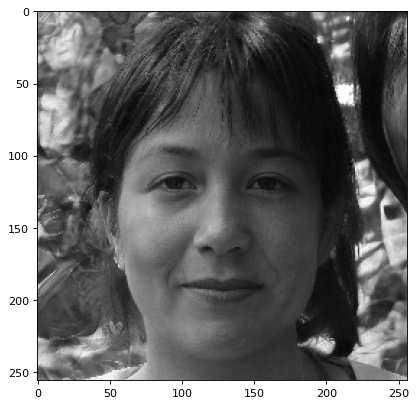

In [ ]:
#Loading a fake image
grey = rgb2gray(image2)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(grey, cmap='gray');

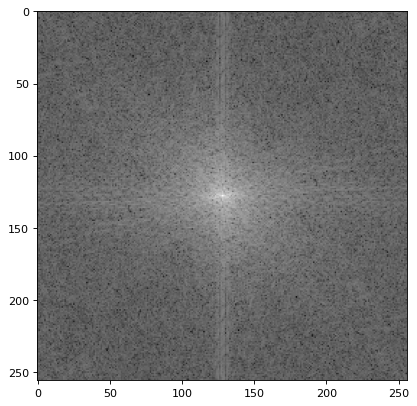

In [ ]:
#Performing FFT on the gray image
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');